Epoch 1/5
625/625 [==============================] - 1s 581us/step - loss: 0.1093 - optionPrice_loss: 0.0539 - delta_loss: 0.0553 - optionPrice_root_mean_squared_error: 0.2323 - delta_root_mean_squared_error: 0.2352
Epoch 2/5
625/625 [==============================] - 0s 628us/step - loss: 0.0910 - optionPrice_loss: 0.0455 - delta_loss: 0.0456 - optionPrice_root_mean_squared_error: 0.2132 - delta_root_mean_squared_error: 0.2134
Epoch 3/5
625/625 [==============================] - 0s 631us/step - loss: 0.0902 - optionPrice_loss: 0.0451 - delta_loss: 0.0452 - optionPrice_root_mean_squared_error: 0.2123 - delta_root_mean_squared_error: 0.2125 0s - loss: 0.0904 - optionPrice_loss: 0.0452 - delta_loss: 0.0453 - optionPrice_root_mean_squared_error: 0.2125 - delta_root_mean_squared_error: 0 - ETA: 0s - loss: 0.0903 - optionPrice_loss: 0.0451 - delta_loss: 0.0452 - optionPrice_root_mean_squared_error: 0.2123 - delta_root_mean_squared_error: 0.212
Epoch 4/5
625/625 [============================

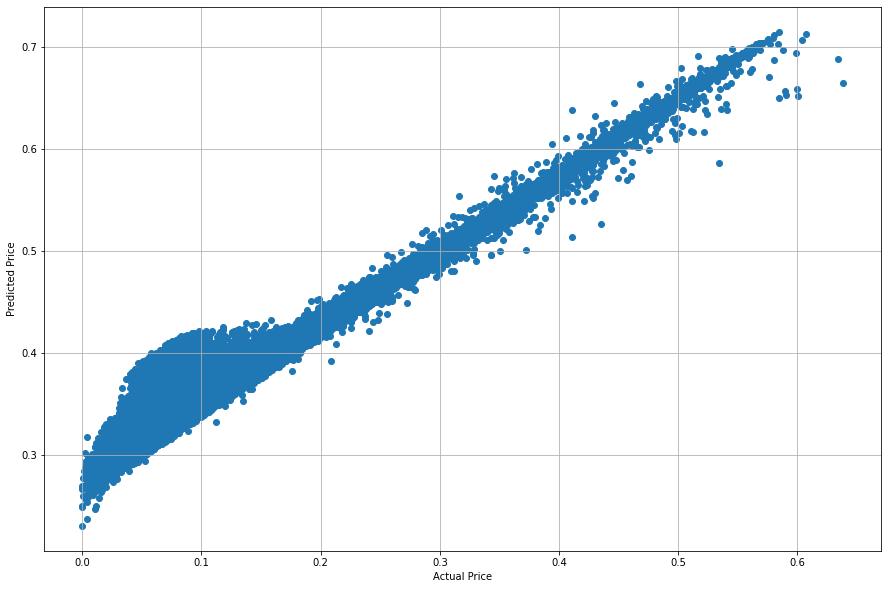

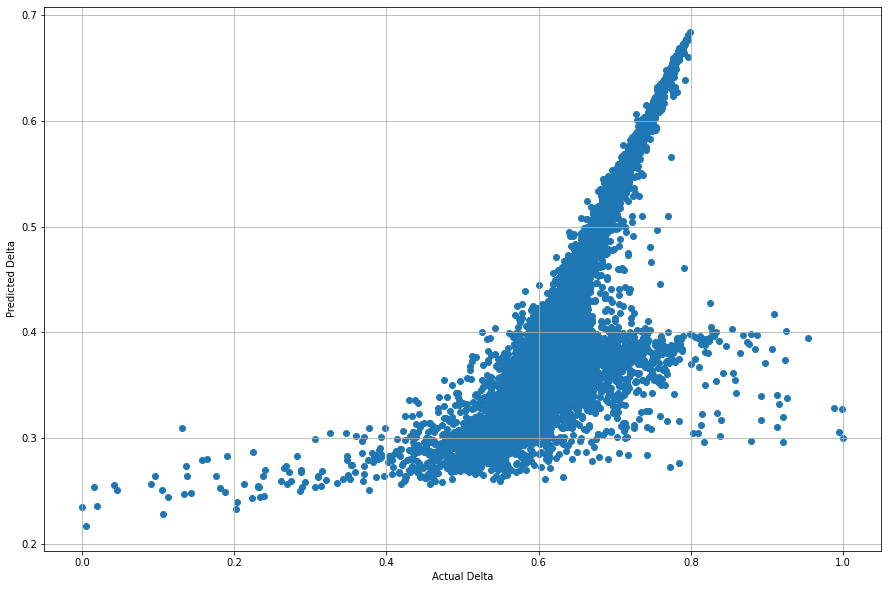

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

import keras
import tensorflow
from keras import backend
from keras.models import Sequential
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

optionsData = pd.read_csv(r'C:\Users\lcyps\Desktop\blackScholes\optionsData.csv')

optionsData["Stock Price"] = optionsData["Stock Price"]/optionsData["Strike Price"]
optionsData["Call Price"] = optionsData["Call Price"]/optionsData["Strike Price"]
optionsData["Strike Price"] = optionsData["Strike Price"]/optionsData["Strike Price"]

optionsData = optionsData.values

X = optionsData[:, :5]
y = optionsData[:, 5:7]
#y = optionsData[:, 5:11]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


##### MODEL 2 TEST ######
def cumulativeModel(inputs):
    x= Dense(128, activation='relu')(inputs)
    x= Dense(32, activation='relu')(x)
    x= Dense(8, activation='relu')(x)
    #x= Dense(4, activation='relu')(x)
    return x


def branchedModel(inputs):
    x = cumulativeModel(inputs)
    optionPrice = Dense(units='1', activation='elu', name='optionPrice')(x)
    delta = Dense(units='1', activation='elu', name='delta')(x)
    model = Model(inputs=inputs, outputs = [optionPrice, delta])
    return model


inputs = keras.layers.Input(shape=(5,))
model = branchedModel(inputs)

model.compile(optimizer='rmsprop',
             loss = {'optionPrice': 'mse',
                    'delta': 'mse'},
             metrics={'optionPrice': keras.metrics.RootMeanSquaredError(),
                     'delta': keras.metrics.RootMeanSquaredError()})

history = model.fit(X_train, y_train, epochs=5, batch_size=128)
#########################

predictions=model.predict(X_test)

callPricePred = predictions[0]
deltaPred = predictions[1]

plt.figure(figsize = (15,10))
plt.scatter(y_test[:, 0], callPricePred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

plt.figure(figsize = (15,10))
plt.scatter(y_test[:, 1], deltaPred)
plt.xlabel("Actual Delta")
plt.ylabel("Predicted Delta")
plt.grid(True)
plt.show()

def plotLinReg(y_test, predictions):
        plt.figure(figsize = (15,10))
        plt.scatter(y_test, predictions)
        plt.xlabel("Actual Price")
        plt.ylabel("Predicted Price")


        y_test = np.array(y_test).flatten()
        predictions = np.array(predictions).flatten()

        m, b = np.polyfit(y_test, predictions, 1)
        plt.plot(y_test, m*y_test+b)

        print(r2_score(y_test, predictions))

        plt.grid(True)
        plt.show()
